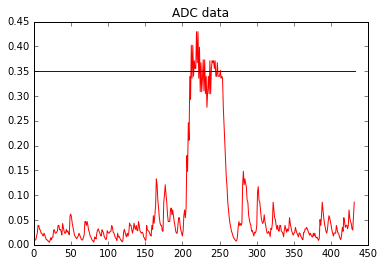

In [10]:
%matplotlib inline
from pynq.pmods import PMOD_ADC
import time
import matplotlib.pyplot as plt

# initialize ADC on PMOD 1 (JB).
# The ADC DA4 has 4 input channels at 12 bit resolution, however only the first 3: 
# V1, V2 and V3 (form 0 to 2) can be used.
# PMOD mapping is: PMOD 1 -> JB, PMOD 2 -> JC, PMOD 3 -> JD, PMOD 4 -> JE
pmod_adc = PMOD_ADC(1)

# read the tension value for V1 (V1 -> 0) and print it
#value = pmod_adc.read(0)
#print("Current voltage: " + str(value) + "V")

# start logging on V3 (V3 -> 2) with log interval of 1 ms
# NOTE: the current driver allows to log only one input at a time,
# to get data from multiple inputs at the same time you need to get them manually within a loop
#2 è IL CANALE DI LETTURA , 10 INTERVALLO TRA OGNI CAMPIONE(ms)
pmod_adc.start_log(2, 10)

# TEMPO DI ACQUISIZIONE

time.sleep(5)

# get and stop logging
values = pmod_adc.get_log()

# draw graph
plt.plot(range(len(values)), values, 'r')
plt.plot([0,len(values)],[0.35,0.35],'b')
plt.title('ADC data')
plt.show()


In [11]:
import numpy as np
np.savetxt("Russata9.npy",values)

Hai russato al tempo 0.86 secondi.
Hai russato al tempo 2.9 secondi.


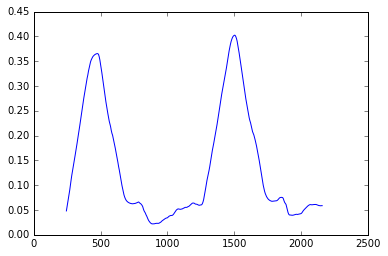

In [17]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pynq.pmods import Grove_Haptic_Motor

hapticMotor = Grove_Haptic_Motor(4, 4)

russata=np.loadtxt("Russata7.npy")
media=pd.rolling_mean(russata,50)
t=np.arange(0,len(russata)*5,5)
russamento=False
count=0
for i in range(len(media)):
    if media[i]>0.35 and media[i-1]<=0.35: #soglia sperimentale
        print("Hai russato al tempo "+str(i/100)+" secondi.")
        count=count+1
        russamento=True
        
if count>=2:
    hapticMotor.play_sequence([70])
    
plt.plot(t,media)
plt.show()



In [16]:
#cross-correlazione tra finestra con zero-padding e segnale 
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import rfft, irfft

def calcoloCCR(data, arrwnd):

#le due liste da confrontare devono avere stessa lunghezza

    template=arrwnd.tolist()
    
    #Zero padding
    for i in range (len(arrwnd),len(data)):
        template.append(0)

    # Fast Fourier Transform (FFT)
    Data= rfft(data)
   
    # Inverto il vettore template
    tempY = []
    while len(template) > 0:
        tempY.append(template.pop())
    
    Y = rfft(tempY)

    # Faccio la formula inversa della FFT
    CrossCorrelazione = irfft(Data*Y)
    print(len(CrossCorrelazione))
    
    #Normalizzazione
    #DataSTD=np.nanstd(data)
    #TemSTD=np.nanstd(template)
    #print(DataSTD)
    #print(TemSTD)
    
    x=np.arange(len(CrossCorrelazione))
    plt.plot(x,CrossCorrelazione)
    plt.xlabel("Campioni")
    plt.ylabel("CrossCorrelazione")
    plt.show()


772


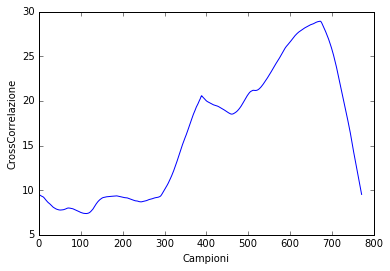

In [7]:
segnale=np.loadtxt("RussataDoppia3.npy")
arrwnd=np.loadtxt("Template.npy")
calcoloCCR(segnale,arrwnd)

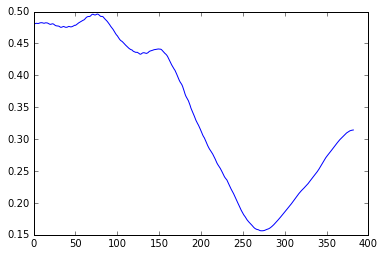

In [26]:
arrwnd=np.loadtxt("Template.npy")
plt.plot(np.arange(len(arrwnd)),arrwnd)
plt.show()

In [7]:
!cd /home/xpp && tar -xvf extra-drivers.tar && cd drivers_archive && ./install.sh

drivers_archive/
drivers_archive/grove_ear_hr.bin
tar: drivers_archive/grove_ear_hr.bin: time stamp 2016-07-05 23:16:14 is 1467756243.01002209 s in the future
drivers_archive/grove_ear_hr.py
tar: drivers_archive/grove_ear_hr.py: time stamp 2016-07-05 23:16:14 is 1467756243.008376451 s in the future
drivers_archive/grove_color.bin
tar: drivers_archive/grove_color.bin: time stamp 2016-07-05 23:16:14 is 1467756243.007718083 s in the future
drivers_archive/grove_color.py
tar: drivers_archive/grove_color.py: time stamp 2016-07-05 23:16:14 is 1467756243.006968053 s in the future
drivers_archive/grove_finger_hr.py
tar: drivers_archive/grove_finger_hr.py: time stamp 2016-07-05 23:16:14 is 1467756243.00626923 s in the future
drivers_archive/grove_finger_hr.bin
tar: drivers_archive/grove_finger_hr.bin: time stamp 2016-07-05 23:16:14 is 1467756243.005606354 s in the future
drivers_archive/grove_haptic_motor.bin
tar: drivers_archive/grove_haptic_motor.bin: time stamp 2016-07-05 23:16:14 is 1467756